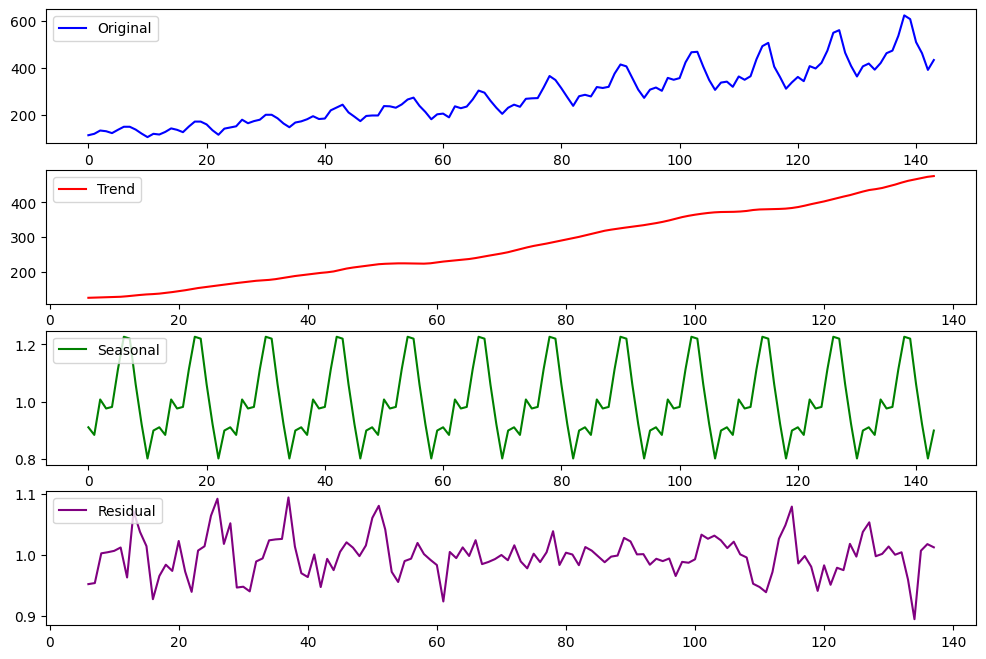

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load dataset
data = sm.datasets.get_rdataset('AirPassengers').data
data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')

# Decompose the time series multiplicatively
decomposition = sm.tsa.seasonal_decompose(data['value'], model='multiplicative', period=12)

# Plotting the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
ax1.plot(data['value'], label='Original', color="blue")
ax1.legend(loc='upper left')
ax2.plot(decomposition.trend, label='Trend', color="red")
ax2.legend(loc='upper left')
ax3.plot(decomposition.seasonal, label='Seasonal', color="green")
ax3.legend(loc='upper left')
ax4.plot(decomposition.resid, label='Residual', color="purple")
ax4.legend(loc='upper left')
plt.show()


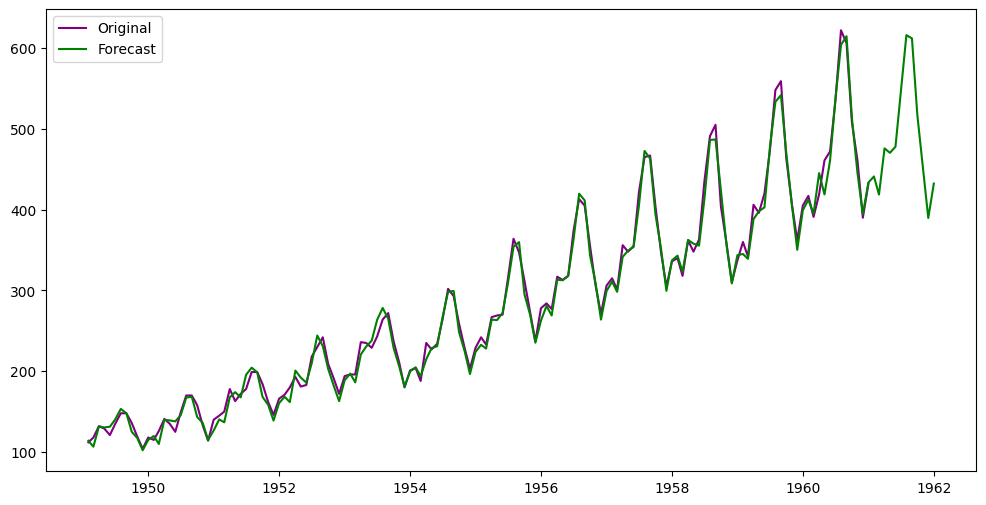

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load dataset
data = sm.datasets.get_rdataset('AirPassengers').data
data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')

# Holt-Winters Exponential Smoothing
model = ExponentialSmoothing(data['value'], seasonal='multiplicative', seasonal_periods=12)
fit = model.fit()
forecast = fit.forecast(12)

# Creating time index for forecast
forecast_index = pd.Series(pd.date_range(start='1961-01', periods=12, freq='M'))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data['value'], label='Original', color = 'purple')
plt.plot(pd.concat([pd.Series(data['time']), forecast_index]), pd.concat([fit.fittedvalues, forecast]), label='Forecast', color = 'green')
plt.legend()
plt.show()




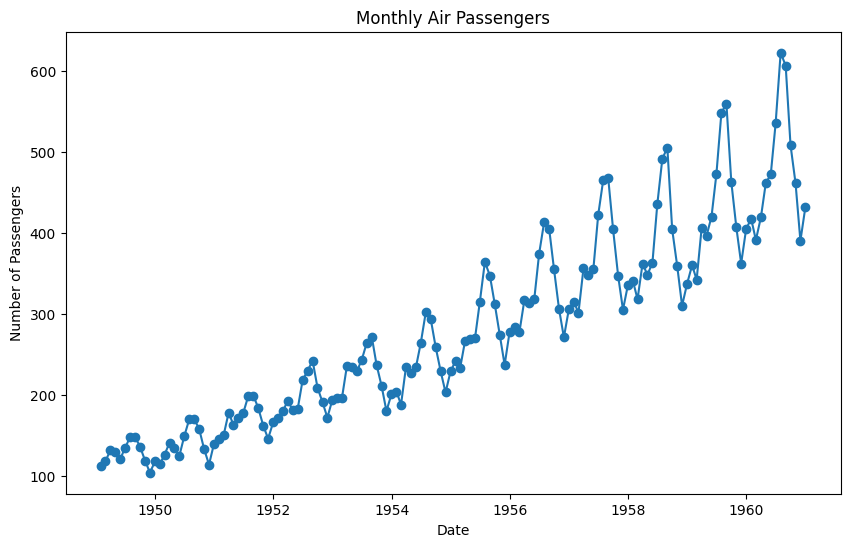

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the Air Passenger dataset
data = sm.datasets.get_rdataset('AirPassengers').data

# Create a time index (the dataset only has the year as the time column)
data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data.set_index('time', inplace=True)

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(data['value'], marker='o')
plt.title('Monthly Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()


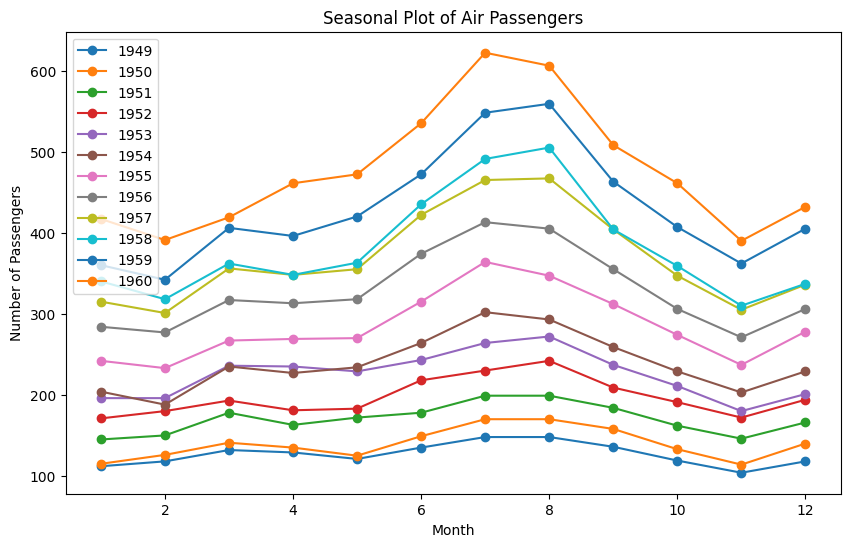

In [ ]:
# Extract year and month
data['Year'] = data.index.year
data['Month'] = data.index.month

# Seasonal plot
plt.figure(figsize=(10, 6))
for year in data['Year'].unique():
    plt.plot(data[data['Year'] == year]['Month'], data[data['Year'] == year]['value'], marker='o', label=year)
plt.title('Seasonal Plot of Air Passengers')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()



<Figure size 1000x600 with 0 Axes>

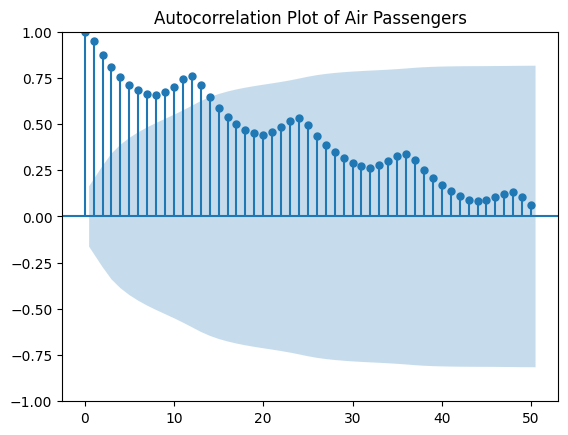

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Autocorrelation plot
plt.figure(figsize=(10, 6))
plot_acf(data['value'], lags=50)
plt.title('Autocorrelation Plot of Air Passengers')
plt.show()


<Figure size 1000x600 with 0 Axes>

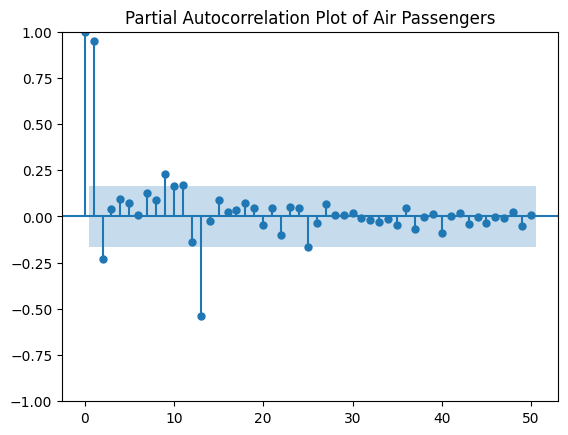

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

# Partial autocorrelation plot
plt.figure(figsize=(10, 6))
plot_pacf(data['value'], lags=50)
plt.title('Partial Autocorrelation Plot of Air Passengers')
plt.show()


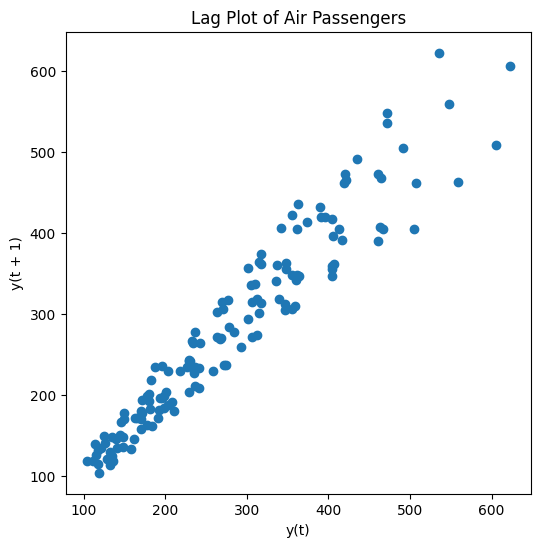

In [ ]:
from pandas.plotting import lag_plot

# Lag plot
plt.figure(figsize=(6, 6))
lag_plot(data['value'])
plt.title('Lag Plot of Air Passengers')
plt.show()


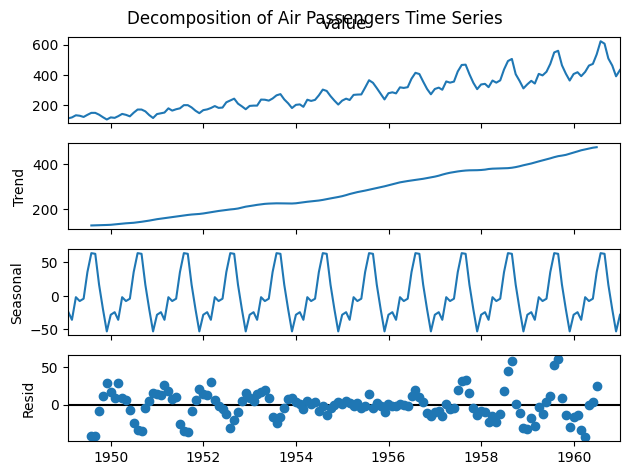

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposition plot
result = seasonal_decompose(data['value'], model='additive', period=12)
result.plot()
plt.suptitle('Decomposition of Air Passengers Time Series')
plt.show()


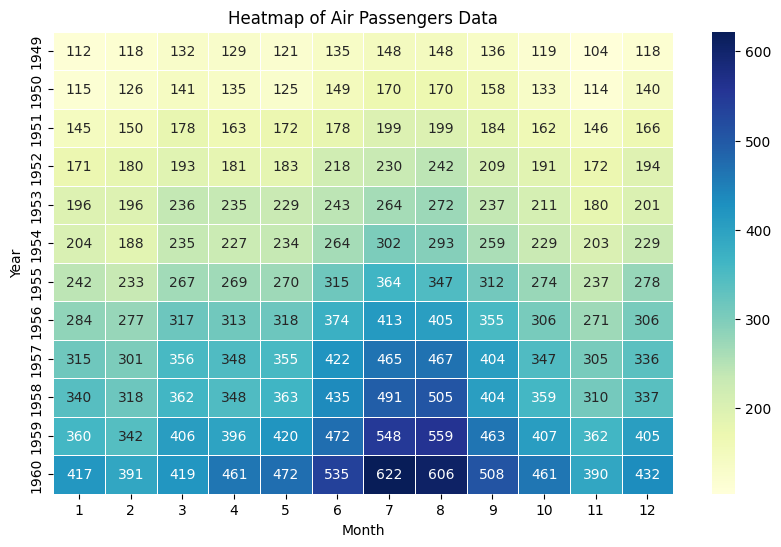

In [ ]:
import seaborn as sns

# Pivot table to create a heatmap-friendly format
heatmap_data = data.pivot_table(values='value', index=data.index.year, columns=data.index.month)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap of Air Passengers Data')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

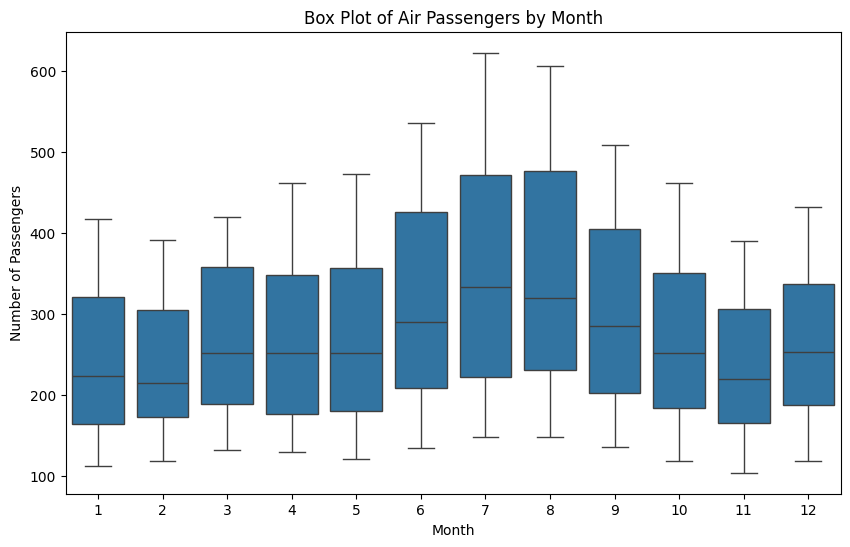

In [ ]:
import seaborn as sns

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='value', data=data.reset_index())
plt.title('Box Plot of Air Passengers by Month')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.show()



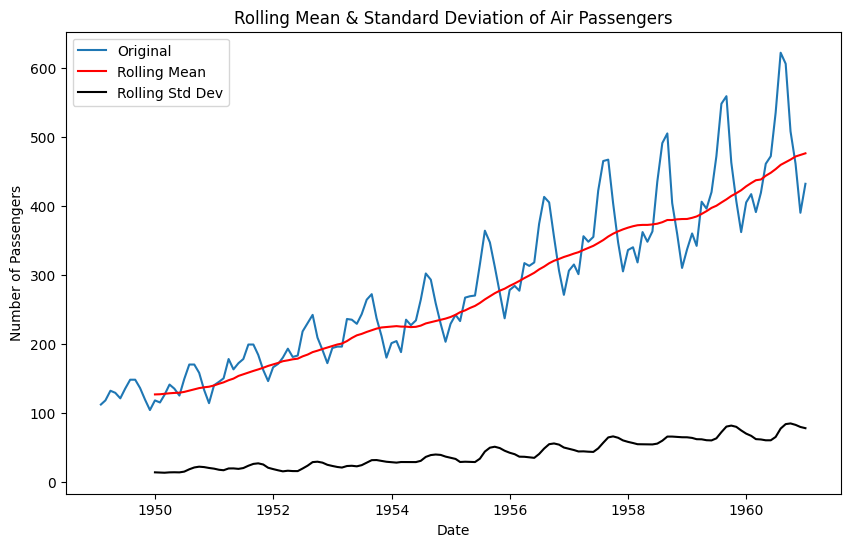

In [ ]:
# Rolling mean and standard deviation
rolling_mean = data['value'].rolling(window=12).mean()
rolling_std = data['value'].rolling(window=12).std()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data['value'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='black')
plt.title('Rolling Mean & Standard Deviation of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


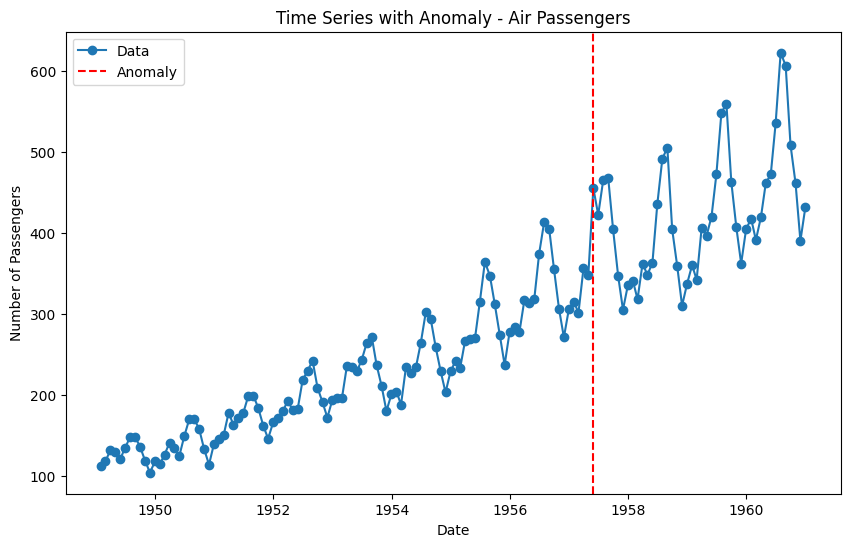

In [ ]:
import numpy as np

# Introduce an artificial anomaly
data_anomaly = data.copy()
data_anomaly.iloc[100] += 100  # Add an anomaly

# Plotting with anomaly
plt.figure(figsize=(10, 6))
plt.plot(data_anomaly['value'], marker='o', label='Data')
plt.axvline(data_anomaly.index[100], color='red', linestyle='--', label='Anomaly')
plt.title('Time Series with Anomaly - Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


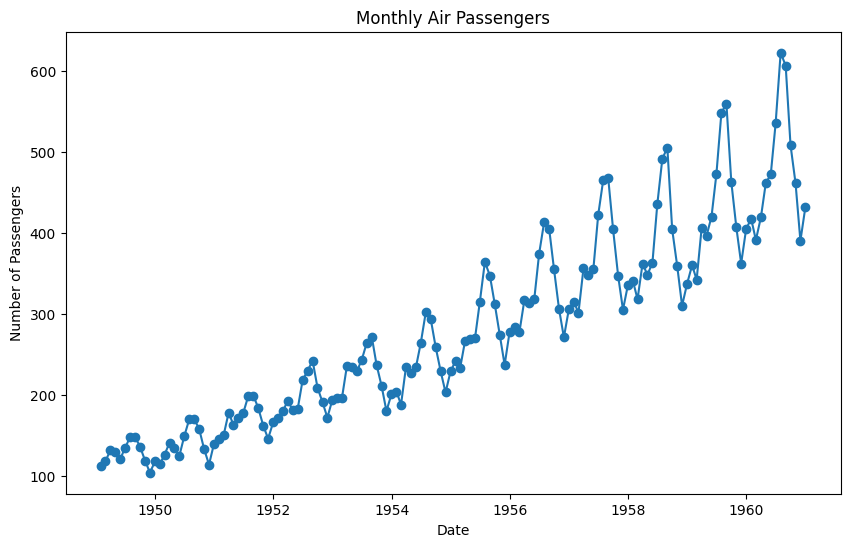

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the Air Passenger dataset
data = sm.datasets.get_rdataset('AirPassengers').data

# Create a time index (the dataset only has the year as the time column)
data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data.set_index('time', inplace=True)


# Line plot to visualize the time series
plt.figure(figsize=(10, 6))
plt.plot(data['value'], marker='o')
plt.title('Monthly Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()



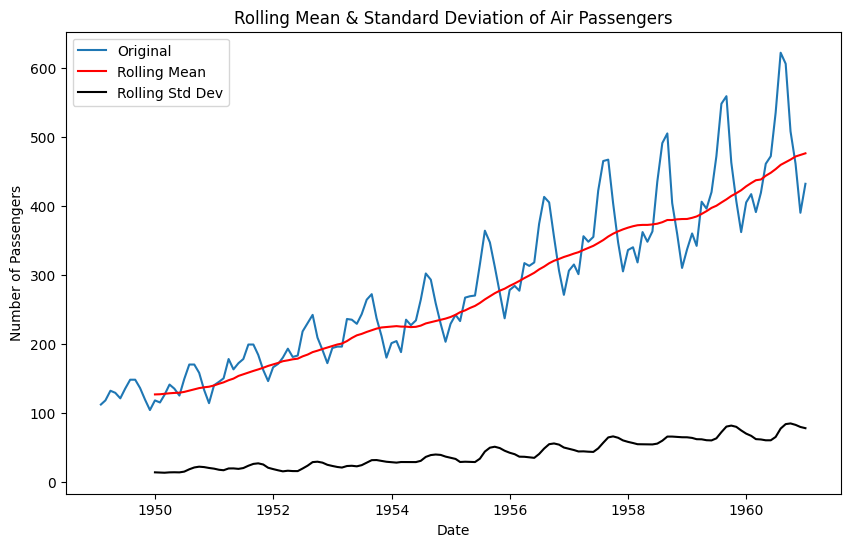

In [ ]:
# Rolling statistics
rolling_mean = data['value'].rolling(window=12).mean()
rolling_std = data['value'].rolling(window=12).std()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data['value'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='black')
plt.title('Rolling Mean & Standard Deviation of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_test = adfuller(data['value'])

print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])


ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


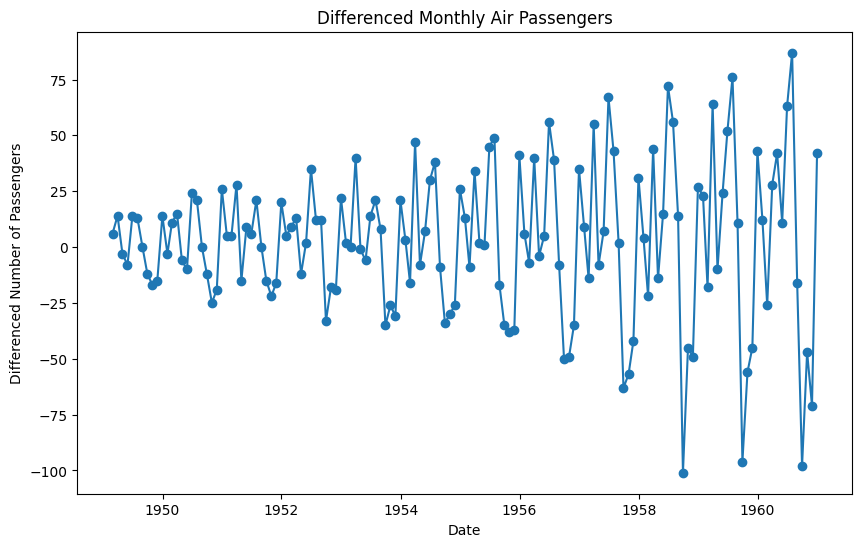

In [ ]:
# Differencing the data
data_diff = data['value'].diff().dropna()

# Plotting the differenced data
plt.figure(figsize=(10, 6))
plt.plot(data_diff, marker='o')
plt.title('Differenced Monthly Air Passengers')
plt.xlabel('Date')
plt.ylabel('Differenced Number of Passengers')
plt.show()


In [ ]:
# Perform ADF test on differenced data
adf_test_diff = adfuller(data_diff)

print('ADF Statistic after Differencing:', adf_test_diff[0])
print('p-value after Differencing:', adf_test_diff[1])


ADF Statistic after Differencing: -2.8292668241700047
p-value after Differencing: 0.05421329028382478
